In [19]:
import pandas as pd

In [20]:
df=pd.read_csv('data.csv')

In [21]:
df.columns

Index(['Unnamed: 0', 'ID', 'DATE', 'Month', 'Day of week', 'Crash Time',
       'Road Surface Condition', 'Ambient Light', 'Weather Condition', 'PRCP',
       'SNOW', 'TMAX', 'TMIN', 'lon', 'lat', 'label'],
      dtype='object')

In [22]:
df=df.drop('Unnamed: 0',axis=1)

In [23]:
df=df.drop('ID',axis=1)

In [38]:
type(df['DATE'])

pandas.core.series.Series

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

In [56]:
IE = preprocessing.LabelEncoder()
data = df.apply(IE.fit_transform)

In [60]:
from sklearn.model_selection import train_test_split

X=data[['DATE', 'Month', 'Day of week', 'Crash Time', 'Road Surface Condition',
       'Ambient Light', 'Weather Condition', 'PRCP', 'SNOW', 'TMAX', 'TMIN']]  # Features
y=data['label']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [61]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [63]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [64]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.07462412907957462


In [65]:
feature_cols = ['DATE', 'Month', 'Day of week', 'Crash Time', 'Road Surface Condition',
       'Ambient Light', 'Weather Condition', 'PRCP', 'SNOW', 'TMAX', 'TMIN']

In [66]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Crash Time                0.230213
DATE                      0.169274
TMAX                      0.146728
TMIN                      0.145443
PRCP                      0.078515
Day of week               0.067839
Month                     0.062998
Weather Condition         0.040355
Road Surface Condition    0.023409
Ambient Light             0.021655
SNOW                      0.013572
dtype: float64

No handles with labels found to put in legend.


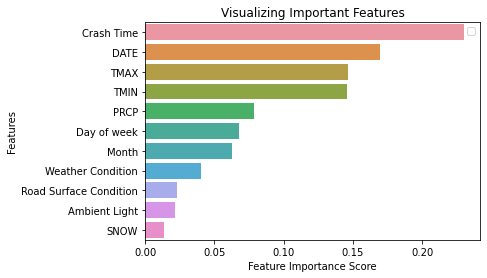

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()